<a href="https://colab.research.google.com/github/L3borim/LoL-Match-Prediction-Project-IA2024S1/blob/dev3/IA_2024S1_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# ***Predição de Melhor Composição de Campeões do League of Legends***
---

*Siga esse template para entrega do seu artigo/projeto. O código deste notebook precisa ser 100% executável* não podendo, assim, fazer referência a arquivos locais ou privados.

Neste projeto você deve **explorar algumas tecnologias que são o estado da arte da IA e do Aprendizado de Máquina (modelos largos de linguagem - APIs ChatGPT, Gemini, Meta Llama -, modelos neurais profundos - TensorFlow, PyTorch -, aprendizado com imagem, som ou vídeo - OpenCV, OpenPose, Yolo -, modelos pré-treinados - transfer learning -, ou aplicação de modelos em casos reais)**. Em geral são temas que não tratamos em sala, seja pelo tempo, seja pela necessidade de focarmos nos fundamentos. O grupo pode optar por dar continuidade à proposta que apresentou no 1o bimestre, levando em consideração os comentários do professor, ou escolher um outro tema dentro dos mesma premissa explorar novos modelos.

Vocês devem produzir um *artigo*, a exemplo de artigos do *Medium* (\*) ou outros canais semelhantes, para que seu grupo, colegas e leitores do trabalho tenham aqui um ponto de partida para uso da tecnologia/conceito escolhido. Desse modo é importante a linguagem, o trabalho deve, antes de tudo **comunicar**.

Você pode, e é mesmo esperado, que você empregue referências e implementações de outros trabalhos. Mas é importante que você **1. Indique adequadamente as referências**, e **2. Implemente algum diferencial na sua solução**, o que pode ser um conjunto de dados diferente, comparação com outro modelo etc.

<br>

(\*) *Atendendo critérios mínimos, convidarei os dois melhores trabalhos para fazermos uma publicação no Medium.*


In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<TIA\>,\<nome\>*)
Aluno1 = '10375711, Gabriel Marques G. Almeida' #@param {type:"string"}
Aluno2 = '10390123, Leonardo Borim Silva' #@param {type:"string"}
Aluno3 = '10390316, Mateus Yoon' #@param {type:"string"}
Aluno4 = '10390484, Samy Idesis' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Resumo (*Abstract*)**

Este projeto acadêmico tem como objetivo utilizar dados da API da Riot Games para treinar um modelo preditivo capaz de prever o vencedor de uma partida de League of Legends, seja o lado azul (blue) ou o lado vermelho (red). Para isso, utilizamos a API da Riot para obter dados de 888 partidas, todas do ranking mais alto do jogo, o "Challenger". Coletamos informações sobre os campeões escolhidos pelos jogadores em cada partida, tanto do lado azul quanto do lado vermelho, e o resultado final da partida. Com esses dados obtidos, treinamos um modelo que pode prever o vencedor de uma nova partida com base nas escolhas dos campeões. (ARRUMAR SAMY E XI)

# **Referencial Teórico**

XI e SAMY
API DA RIOT -> https://developer.riotgames.com/apis

Apresente os principais conceitos da tecnologia ou princípio explorado no seu trabalho (o que é? como funciona? Suas aplicações). Não deixe de indicar referências e incluir ilustrações/esquemas quando necessário. Empregue 2-3 páginas.







> ## **Conceitos Chave**

> ### 1. *League of Legends*
O projeto teve como motivação o jogo MOBA "League of Legends" que através d

> ### 2. *Coleta de Dados API Riot Games*
Para o início do projeto foi utilizado a API da Riot Games (https://developer.riotgames.com/apis) para a coleta dos dados das partidas, sendo possível observar o passo a passo feito na aba de "Implementação". Sendo essencial para o trabalho tendo em vista que será a única base de dados que teremos para o projeto.

> ### 3. *Aprendizado Supervisionado*
O aprendizado supervisionado utiliza conjuntos de treinamentos para ensinar os modelos a produzir os resultados desejados, fazendo com que ele aprenda com entradas (Composição dos times) e saídas (Time vencedor) durante o tempo.

> ### 4. *Modelos de classificação*
Para a conclusão do projeto foi utilizado diversos modelos de classificação, tendo como objetivo proporcionar uma análise dos dados mais completas possível, permitindo a identificação do melhor modelo para a obtenção de previsões mais precisas, tendo em vista que cada modelo de classificação possui seu próprio mecanismo de funcionamento, levando a desempenhos variados em diferentes tipos de dados.

> ### 4.1 *Árvore de decisão*
O modelo de árvore de decisão tem como princípio empregar a probabilidade dos valores dos atributos no lugar dos próprios valores

> ### 4.2 *Floresta aleatória*
Diferentemente da árvore de decisão comum, o algorítmo floresta aleatória, como o próprio nome já diz, adiciona aleatoriedade na seleção dos atributos, e é denominado como floresta justamente por combinar diversas árvores de decisão, onde cada árvore terá influência no resultado final, como forma de melhorar a precisão e podendo ser responsável por resolver problemas como o de Overfiting - quando uma árvore cresce muito e seus dados não são bem trabalhados, ela tende a apresentar um ajuste excessivo exclusivo aos dados de treinamento, manifestando dificuldade para generalização de novas previsões.

> ### 4.3 *AdaBoost Classifier*
O nome acima é derivado de adaptative boosting (reforço adaptável) que é um modelo de classificação que, por combina múltiplos algoritmos de classificação fracos, aqueles que são simples e apresentam desempenho indesejável - mas melhor do que advinhar respostas aleatoriamente, para trnasformá-los em um único forte. Seu funcionamento ocorre por meio da atualização dos pesos atribuídos (com base no percentual) de cada algoritmo que ele testa para classificar, de forma iterativa, ou seja, vai treinando uma série de classificadores fracos de forma iterativa e ajustando os pesos dos exemplos de treinamento com base no desempenho dos classificadores anteriores, até chegar no classificador combinado, o forte.

> ### 4.4 *K-Vizinhos mais próximos*
O algoritmo K-vizinhos mais próximos é um dos modelos mais simples, ele utiliza distância/proximidade do ponto mais próximo como método de previsão, isto é, se os vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria.

> ### 4.5 *Extra Trees classifier*
O extra tree provém de Extremely Randomized Trees, e é um algoritmo baseado nas árvores de decisão, sendo uma variante do Random Forest (visto anteriormente)por trazer mais um fator de aleatoriedade. Diferentemente do Random Forest, cada árvore de decisão construída irá escolher de forma completamente aletória qual limiar de atributo será adotado em cada divisão, ou seja, o parâmetro "splitter" (ponto de divisão) sendo igual a "random". Não ter que buscar sempre o melhor ponto de divisão torna tal algoritmo muito mais rápido de se treinar e aleatório para a construção das árvores em compração com o Random Forest.

> ### 4.6 *GaussianNB classifier*
O algoritmo Naive Bayes Gaussiano é um classificador probabilístico que assume que as features são independentes entre si (Naive = Ingênuo) facilitando o cálculo das probabilidades para a classificação. Ele define uma tabela de probabilidades que consta a frequência dos preditores com relação às variáveis de saída, e para o cálculo final escolhe a classe que maximiza a probabilidade dada as características observadas. O algoritmo é simples e rápido e frequentemente utilizado para classificar textos, como classificação de e-mails como spam ou não spam.

> ### 4.7 *SVC*
SVC é uma implementação especíica do algoritmo SVM projetada para tarefas de classificação. Seu funcionamento decorre de ajustar os dados fornecidos como treinamento, retornando um hiperplano que melhor separa ou categoriza os diferentes grupos de dados. Com isso é possível alimentar o classificador para prever a qual grupo novos dados pertencem.

# **Exemplo de Aplicação**

XI E SAMY (Mano da pra fazer essa predição em sites de apostas de lol KKKKK)
Descreva aqui um pequeno problema que você resolverá aplicando a tecnologia/conceito envolvido. O código/solução não precisa ser original, mas não deixe de dar as referências dessa solução. Lembre-se que o notebook precisa ser 100% executável e, portanto, você não deve empregar arquivos locais da sua máquina.

Empregue aqui um ou dois parágrafos.



# **Implementação**

Coloque aqui o código da sua solução. Você deve explicar em linhas gerais o código. Para isso você pode quebrar o código em algumas partes e incluir células de texto explicativos. Não empregue para isso comentários no corpo do código, mas crie células de texto do notebook.

Tente empregar exemplos que não sejam muito complexos e que busquem dar a você ou ao leitor um ponto de partida para o uso da tecnologia/conceito explorado.

Ao final, se julgar útil, você pode ter uma célula com o código completo do que foi aqui dividido para explicar as diferentes partes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Este codigo apresenta como foi feita a coleta de dados usando a API da Riot Games. Colocamos como texto para mostrar como foi a coleta e usamos depois um csv para o treinamento pois demora para obter os dados (a API tem limite de request)
```
import requests
import time
```
#Key dada para uso da API, valida apenas 24h (é necessario criar uma conta RIOT)
```
api_key = "RGAPI-9f136d42-d3a1-45c4-8366-4575483a95bf"
```
#Essa funçao usa a API para pegar o ID da partidas usando o PUUID do jogador.
```
def get_all_match_ids(puuid, region='americas', total_count=200):
    match_ids = []
    for start in range(0, total_count, 100):
        matches_url = f"https://{region}.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start={start}&count=100&api_key={api_key}"
        matches_response = requests.get(matches_url)
        match_ids.extend(matches_response.json())
        # Dormir um pouco para respeitar os limites de taxa
        time.sleep(1)
    return match_ids
```
#Essa função usa a API que usa o ID da partida para pegar os detalhes das partidas (os 10 campeoes utilizados)
```
def get_match_details(match_id, region='americas'):
    match_url = f"https://{region}.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={api_key}"
    while True:
        match_response = requests.get(match_url)
        if match_response.status_code == 200:
            return match_response.json()
        elif match_response.status_code == 429:  
            retry_after = int(match_response.headers.get('Retry-After', 1))
            time.sleep(retry_after)
        else:
            match_response.raise_for_status()
```

#Essa função obtem o PUUID de um jogador usando o RIOT_ID e tag (dados publicos)
```
def get_puuid(riot_id, tag_line, region='americas'):
    puuid_url = f"https://{region}.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{riot_id}%20/{tag_line}?api_key={api_key}"
    puuid_response = requests.get(puuid_url)

    # Verificar se a resposta é bem-sucedida
    if puuid_response.status_code != 200:
        raise Exception(f"Erro ao buscar PUUID: {puuid_response.status_code}")

    puuid_data = puuid_response.json()

    # Verificar se a chave 'puuid' está na resposta
    if 'puuid' not in puuid_data:
        raise KeyError("'puuid' não encontrado na resposta da API")

    return puuid_data['puuid']
```

# Lista de jogadores (nomes riot_id e tags)
#top 5 jogadores BR
```
players = [
    ('randal', 'zero1'),
    ('fuuuuuuuu', '99999'),
    ('Dernière danse', 'IMPz'),
    ('frosty', 'KR3'),
    ('Kojima', '2840'),
    # Adicione mais jogadores conforme necessário
]

region = 'americas'  # Região dos jogadores

```

# Coletar dados de partidas para todos os jogadores
```
all_matches_data = []
for riot_id, tag_line in players:
    puuid = get_puuid(riot_id, tag_line, region)
    match_ids = get_all_match_ids(puuid)
    for match_id in match_ids:
        match_details = get_match_details(match_id)
        all_matches_data.append(match_details)
```

# Processar dados das partidas para criar o DataFrame, retira apenas o "championName" da partida e quem ganhou.
```
data = []
for match in all_matches_data:
    blue_team = [p['championName'] for p in match['info']['participants'] if p['teamId'] == 100]
    red_team = [p['championName'] for p in match['info']['participants'] if p['teamId'] == 200]

    # Verificar se ambos os times têm exatamente 5 campeões
    if len(blue_team) == 5 and len(red_team) == 5:
        result = 'Blue' if match['info']['teams'][0]['win'] else 'Red'
        data.append(blue_team + red_team + [result])

columns = ['Champion1_Blue', 'Champion2_Blue', 'Champion3_Blue', 'Champion4_Blue', 'Champion5_Blue',
           'Champion1_Red', 'Champion2_Red', 'Champion3_Red', 'Champion4_Red', 'Champion5_Red', 'Result']
df = pd.DataFrame(data, columns=columns)

```
#Cria o CSV
```
csv_file = 'partidas_data.csv'
df.to_csv(csv_file, index=False)

# Baixar o arquivo CSV
from google.colab import files
files.download(csv_file)
```

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/L3borim/LoL-Match-Prediction-Project-IA2024S1/main/partidas_data.csv')

df.head()

,Champion1_Blue,Champion2_Blue,Champion3_Blue,Champion4_Blue,Champion5_Blue,Champion1_Red,Champion2_Red,Champion3_Red,Champion4_Red,Champion5_Red,Result
0,Camille,Poppy,Qiyana,Tristana,Pantheon,Urgot,Brand,Twitch,Lucian,Milio,Red
1,Akali,Kayn,Ryze,Corki,Nautilus,Garen,Lillia,Leblanc,Jinx,Milio,Red
2,Camille,Sejuani,Hwei,Caitlyn,Rell,Jax,LeeSin,Lux,Jhin,Janna,Red
3,Camille,LeeSin,Hwei,Jhin,Sona,Vladimir,Skarner,Yasuo,Samira,Milio,Blue
4,Camille,JarvanIV,Xerath,Jhin,Nautilus,Jayce,Lillia,Lux,Seraphine,Senna,Red


In [ ]:
# Supondo que seu DataFrame esteja na variável `df`
# Converter a coluna 'Result' para valores binários (0 para Red, 1 para Blue)
label_encoder = LabelEncoder()
df['Result'] = label_encoder.fit_transform(df['Result'])

# One-hot encoding para os campeões
X = pd.get_dummies(df.drop('Result', axis=1))
y = df['Result']

In [ ]:
classificadores = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(),
    KNeighborsClassifier(),
    ExtraTreesClassifier(random_state=42),
    GaussianNB(),
    SVC()
]

In [ ]:
# Aqui iremos guardar o resultado de cada modelo utilizado
resultados = []

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicia um loop que vai passar por cada modelo que queremos testar
for classificador in classificadores:

    # Cria uma sequencia de passos que serão aplicados aos dados
    # Nesse caso, o único passo é o próprio classificador
    pipeline = Pipeline([
        ('classifier', classificador)
    ])

    # Verifica qual foi a predição do modelo
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Obtendo algumas métricas de avaliação para as predições do modelo
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    report = classification_report(y_test, y_pred)
    print(f'Report Classificador: {classificador.__class__.__name__}')
    print('Classification Report:')
    print(report)
    print('\n')

    # Adiciona o nome do classificador e as pontuações de cada um na lista de resultados
    resultados.append((classificador.__class__.__name__, accuracy, recall, precision, f1))

Report Classificador: DecisionTreeClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.54      0.49        65
           1       0.69      0.60      0.64       111

    accuracy                           0.58       176
   macro avg       0.57      0.57      0.57       176
weighted avg       0.60      0.58      0.59       176



Report Classificador: RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.46      0.53        65
           1       0.73      0.84      0.78       111

    accuracy                           0.70       176
   macro avg       0.68      0.65      0.65       176
weighted avg       0.69      0.70      0.69       176



Report Classificador: AdaBoostClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.69      0.53        65
           1       0.72      0.47

In [ ]:
# Crie um DataFrame com os resultados
resultados_df = pd.DataFrame(resultados, columns=['Classificador', 'Acurácia', 'Recall', 'Precisão', 'F1-Score'])

# Ordene os resultados pela Acurácia em ordem decrescente
resultados_df = resultados_df.sort_values(by='Acurácia', ascending=False)

# Exiba os resultados dos modelos
print(resultados_df.head(7))

            Classificador  Acurácia    Recall  Precisão  F1-Score
1  RandomForestClassifier  0.698864  0.698864  0.689054  0.686922
6                     SVC  0.687500  0.687500  0.688750  0.643883
4    ExtraTreesClassifier  0.659091  0.659091  0.648172  0.650498
3    KNeighborsClassifier  0.625000  0.625000  0.632545  0.628064
0  DecisionTreeClassifier  0.579545  0.579545  0.599248  0.585834
2      AdaBoostClassifier  0.551136  0.551136  0.615294  0.555099
5              GaussianNB  0.477273  0.477273  0.646694  0.433712


# **Uma ideia de Projeto de Aplicação**


Apresente aqui uma ideia de projeto original em que a tecnologia/conceito explorada poderia ser empregada. Busque apresentar um problema relevante e atual. Você não precisa implementar mas, se quiser, pode empregar o Exemplo de Aplicação anterior para isso! Neste caso basta fazer um protótipo ou uma prova de conceito. Empregue aqui no máximo 1 página.


In [ ]:
#testando uma nova partida

# Novo conjunto de campeões
new_match = {
    'Champion1_Blue': 'Camille',
    'Champion2_Blue': 'Sejuani',
    'Champion3_Blue': 'Xerath',
    'Champion4_Blue': 'Jhin',
    'Champion5_Blue': 'Sona',
    'Champion1_Red': 'Urgot',
    'Champion2_Red': 'Lillia',
    'Champion3_Red': 'Lux',
    'Champion4_Red': 'Samira',
    'Champion5_Red': 'Senna'
}

new_match_df = pd.DataFrame([new_match])

In [ ]:
# Combinar o novo conjunto de dados com os dados originais para garantir que todas as colunas de dummy estão presentes
combined_df = pd.concat([df.drop('Result', axis=1), new_match_df], axis=0)

# Aplicar one-hot encoding ao conjunto combinado
combined_df_encoded = pd.get_dummies(combined_df)

# Selecionar apenas as colunas do novo conjunto de dados que foram usadas no treinamento
X_new = combined_df_encoded.tail(1)

In [ ]:
# Modelo para fazer a previsão será o que teve os melhores resultados
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer a previsão
prediction = model.predict(X_new)

# Converter o resultado de volta para a label original
result = label_encoder.inverse_transform(prediction)

print(f'Prediction for the new match: {result[0]}')


Prediction for the new match: Red


# **Referências**

Este é um item obrigatório.

# **Vídeo e GitHub**

Publique (YouTube ou qualquer outro de acesso público) um vídeo explicativo apresentando o seu trabalho em no máximo 4min. Foque na relevância do problema e na solução empregada. Salve em um GitHub público seu projeto (o notebook Python).

# **Conclusão**

Com o nosso projeto foi possível perceber como a análise de dados e o aprendizado de máquina podem ser aplicados para resolver problemas reais, bem como fornecer insights valiosos para jogadores e equipes profissionais no cenário de e-sports (nesse caso tendo como referência o cenário do LOL competitivo). Por meio dos dados dispobibilizados pela API da Riot Games, obtendo dados de 805 partidas do ranking mais alto do jogo, foi possível criar um modelo de acuracidade considerável para prever o vencedor de partidas de League of Legends. Contudo, para obter avanços relacionados a precisão do modelo, é possível adotar um número maior do conjunto de treinamento, sem deixar de considerar tal variável para o modelo em questão. Vale ressaltar que as respostas das previsões de vitória podem ser aprimoradas até determinado ponto, não havendo possibilidade de acerto em praticamente todos os confrontos, levando em conta variáveis não manipuláveis (como habilidade de jogador para jogador).





# **Apêndice**

Link da Apresentação no YouTube:


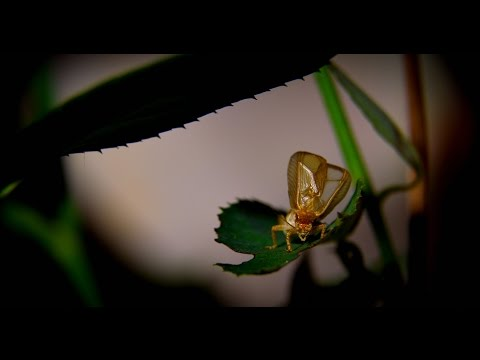

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ssSCGwy_Qfo') # substitua pelo seu vídeo

---

In [ ]:
#@title **Avaliação**
Referencial_Teorico = 10 #@param {type:"slider", min:0, max:10, step:1}

Conceitos_Chave = 9 #@param {type:"slider", min:0, max:10, step:1}

Exemplo_Aplicacao = 6 #@param {type:"slider", min:0, max:10, step:1}

Ideia_Projeto = 7 #@param {type:"slider", min:0, max:10, step:1}

Conclusao = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**
nota = Referencial_Teorico + Conceitos_Chave + 2*Exemplo_Aplicacao + 2*Ideia_Projeto + Conclusao

nota = nota / 7

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.4


NameError: name 'Aluno1' is not defined